# CIFAR-10 Image Classification

This Jupyter notebook demonstrates the process of building and training a neural network for image classification using the CIFAR-10 dataset. The dataset consists of 60,000 32x32 color images in 10 classes, with 6,000 images per class. There are 50,000 training images and 10,000 test images.

## Table of Contents
1. [Imports and Setup](#imports-and-setup)
2. [Data Loading and Preprocessing](#data-loading-and-preprocessing)
3. [Model Building and Training](#model-building-and-training)
4. [Results Visualization](#results-visualization)

## Imports and Setup

We start by importing the necessary libraries and modules.

```python
import os
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL']='3'
from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10
```

We also suppress TensorFlow's verbose logging messages.

## Data Loading and Preprocessing

The CIFAR-10 dataset is loaded using TensorFlow's built-in function. The data is then normalized by dividing the pixel values by 255 to scale them between 0 and 1.

```python
(x_train,y_train),(x_test,y_test) = cifar10.load_data()
x_train,x_test =x_train/255, x_test/255
```

## Model Building and Training

We create a simple neural network using TensorFlow's Sequential API. The network consists of a flattening layer, followed by three dense layers with ReLU activation functions. The output layer uses a softmax activation function for multi-class classification.

```python
net = models.Sequential([
                       layers.Flatten(),
                       layers.Dense(400,activation="relu"),
                       layers.Dense(200,activation="relu"),
                       layers.Dense(80,activation="relu"),
                       layers.Dense(10,activation="softmax")
])
```

We compile the model using the SGD optimizer and sparse categorical cross-entropy loss function, which is suitable for multi-class classification without one-hot encoding.

```python
net.compile(optimizer="SGD",metrics=["accuracy"],
            loss='sparse_categorical_crossentropy')
```

The model is then trained for 15 epochs using a batch size of 16.

```python
H_net=net.fit(x_train,y_train,batch_size=16,epochs=15,validation_data=[x_test,y_test])
```

We also experiment with the Adam optimizer and a learning rate of 0.01.

```python
opt=tf.keras.optimizers.Adam(learning_rate=0.01)
net.compile(optimizer=opt,metrics=["accuracy"],
            loss='sparse_categorical_crossentropy')
H_net=net.fit(x_train,y_train,batch_size=32,epochs=15,validation_data=[x_test,y_test])
```

## Results Visualization

Finally, we visualize the training and validation accuracy and loss using Matplotlib.

```python
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.plot(H_net.history['accuracy'],label='train_accuracy')
plt.plot(H_net.history['val_accuracy'],label='val_accuracy')
plt.plot(H_net.history['loss'],label='train_loss')
plt.plot(H_net.history['val_loss'],label='val_loss')
plt.xlabel('epochs')
plt.ylabel('sss')
plt.title('classfication')
plt.show()
```

The resulting plot allows us to analyze the model's performance and identify any potential issues, such as overfitting or underfitting.

In [1]:
import os 
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL']='3'
from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 161s 1us/step


In [4]:
physical_devices = tf.config.list_physical_devices('GPU')
print("Num GPUs:", len(physical_devices))
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

Num GPUs: 1


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 6916277330295358375
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 3667263488
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 13314109576685177308
 physical_device_desc: "device: 0, name: GeForce RTX 3060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6"
 xla_global_id: 416903419]

In [3]:
x_train,x_test =x_train/255, x_test/255
# creating network
net = models.Sequential([
                       layers.Flatten(),
                       layers.Dense(400,activation="relu"),
                       layers.Dense(200,activation="relu"),
                       layers.Dense(80,activation="relu"),
                       layers.Dense(10,activation="softmax")
])

net.compile(optimizer="SGD",metrics=["accuracy"],
# WITH OUT ONE HOT encoding
loss='sparse_categorical_crossentropy')
H_net=net.fit(x_train,y_train,batch_size=16,epochs=15,validation_data=[x_test,y_test])

Epoch 1/15
3125/3125 [==============================] - 7s 2ms/step - loss: 1.8369 - accuracy: 0.3368 - val_loss: 1.7045 - val_accuracy: 0.3935
Epoch 2/15
3125/3125 [==============================] - 5s 2ms/step - loss: 1.6460 - accuracy: 0.4113 - val_loss: 1.6092 - val_accuracy: 0.4328
Epoch 3/15
3125/3125 [==============================] - 5s 2ms/step - loss: 1.5641 - accuracy: 0.4403 - val_loss: 1.5257 - val_accuracy: 0.4555
Epoch 4/15
3125/3125 [==============================] - 5s 2ms/step - loss: 1.5039 - accuracy: 0.4629 - val_loss: 1.4873 - val_accuracy: 0.4720
Epoch 5/15
3125/3125 [==============================] - 5s 2ms/step - loss: 1.4579 - accuracy: 0.4768 - val_loss: 1.4535 - val_accuracy: 0.4841
Epoch 6/15
3125/3125 [==============================] - 5s 2ms/step - loss: 1.4179 - accuracy: 0.4937 - val_loss: 1.4287 - val_accuracy: 0.4872
Epoch 7/15
3125/3125 [==============================] - 5s 2ms/step - loss: 1.3807 - accuracy: 0.5080 - val_loss: 1.4282 - val_accuracy:

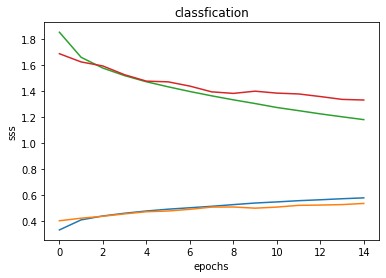

In [3]:
import matplotlib.pyplot as plt 

plt.plot(H_net.history['accuracy'],label='train_accuracy')
plt.plot(H_net.history['val_accuracy'],label='val_accuracy')
plt.plot(H_net.history['loss'],label='train_loss')
plt.plot(H_net.history['val_loss'],label='val_accuracy')
plt.xlabel('epochs')
plt.ylabel('sss')
plt.title('classfication')
plt.show()

In [7]:
x_train,x_test =x_train/255, x_test/255

opt=tf.keras.optimizers.Adam(learning_rate=0.01)
# creating network
net = models.Sequential([
                       layers.Flatten(),
                       layers.Dense(400,activation="relu"),
                       layers.Dense(200,activation="relu"),
                       layers.Dense(80,activation="relu"),
                       layers.Dense(10,activation="softmax")
])

net.compile(optimizer=opt,metrics=["accuracy"],
# WITH OUT ONE HOT encoding
loss='sparse_categorical_crossentropy')
H_net=net.fit(x_train,y_train,batch_size=32,epochs=15,validation_data=[x_test,y_test])


Epoch 1/15
1563/1563 [==============================] - 11s 7ms/step - loss: 1.9386 - accuracy: 0.2708 - val_loss: 1.8227 - val_accuracy: 0.3273
Epoch 2/15
1563/1563 [==============================] - 10s 6ms/step - loss: 1.7839 - accuracy: 0.3445 - val_loss: 1.7060 - val_accuracy: 0.3777
Epoch 3/15
1563/1563 [==============================] - 10s 7ms/step - loss: 1.7317 - accuracy: 0.3684 - val_loss: 1.7325 - val_accuracy: 0.3718
Epoch 4/15
1563/1563 [==============================] - 10s 7ms/step - loss: 1.6858 - accuracy: 0.3897 - val_loss: 1.6548 - val_accuracy: 0.4029
Epoch 5/15
1563/1563 [==============================] - 10s 6ms/step - loss: 1.6472 - accuracy: 0.4045 - val_loss: 1.6512 - val_accuracy: 0.4039
Epoch 6/15
1563/1563 [==============================] - 9s 6ms/step - loss: 1.6241 - accuracy: 0.4144 - val_loss: 1.6035 - val_accuracy: 0.4228
Epoch 7/15
1563/1563 [==============================] - 10s 7ms/step - loss: 1.6022 - accuracy: 0.4202 - val_loss: 1.5923 - val_acc

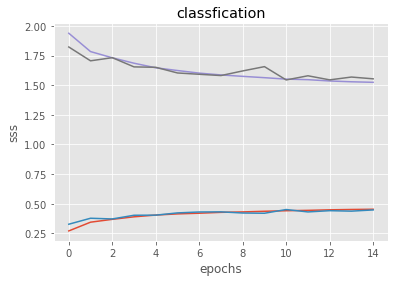

In [9]:
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
plt.plot(H_net.history['accuracy'],label='train_accuracy')
plt.plot(H_net.history['val_accuracy'],label='val_accuracy')
plt.plot(H_net.history['loss'],label='train_loss')
plt.plot(H_net.history['val_loss'],label='val_accuracy')
plt.xlabel('epochs')
plt.ylabel('sss')
plt.title('classfication')
plt.show()